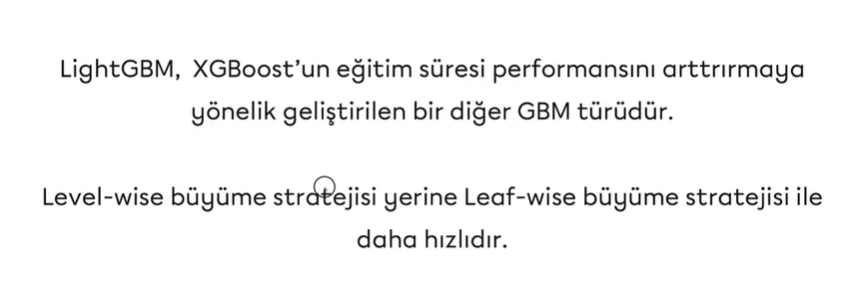

<h2>Xgboost geniş kapsamlı ilk arama yaparken lightGBM derinlemesine ilk arma yapmaktadır </h2>

In [1]:
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate, validation_curve
from sklearn.ensemble import GradientBoostingClassifier, VotingClassifier
import warnings
import joblib 
import pydotplus 
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.tree import DecisionTreeClassifier , export_graphviz, export_text
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.model_selection import train_test_split,GridSearchCV,cross_validate,validation_curve
import pandas as pd
from sklearn.ensemble import GradientBoostingClassifier, VotingClassifier, RandomForestClassifier





import warnings

# Tüm uyarıları kapat
warnings.filterwarnings("ignore")


In [2]:
df = pd.read_csv('../datasets/diabetes.csv')
df.head()
y=df["Outcome"]
X=df.drop(["Outcome"],axis=1)

In [3]:
lgbm_model = LGBMClassifier(random_state=17)

In [4]:
lgbm_model.get_params()

{'boosting_type': 'gbdt',
 'class_weight': None,
 'colsample_bytree': 1.0,
 'importance_type': 'split',
 'learning_rate': 0.1,
 'max_depth': -1,
 'min_child_samples': 20,
 'min_child_weight': 0.001,
 'min_split_gain': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'num_leaves': 31,
 'objective': None,
 'random_state': 17,
 'reg_alpha': 0.0,
 'reg_lambda': 0.0,
 'subsample': 1.0,
 'subsample_for_bin': 200000,
 'subsample_freq': 0}

In [5]:
cv_result = cross_validate(lgbm_model,X,y,cv=5,scoring=["accuracy","f1","roc_auc"])

[LightGBM] [Info] Number of positive: 214, number of negative: 400
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000044 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 667
[LightGBM] [Info] Number of data points in the train set: 614, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.348534 -> initscore=-0.625489
[LightGBM] [Info] Start training from score -0.625489
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


In [6]:
cv_result['test_roc_auc'].mean()


0.7990293501048218

In [7]:
cv_result['test_f1'].mean()


0.624110522144179

In [8]:
cv_result['test_accuracy'].mean()


0.7474492827434004

In [21]:
lgbm_params = {
    "learning_rate": [0.01, 0.1],
    "n_estimators": [100, 300, 500, 1000],
    "colsample_bytree": [0.5, 0.7, 1]
}


In [ ]:
lgbm_best_grid = GridSearchCV(lgbm_model,lgbm_params,cv=5,n_jobs=-1,verbose=False).fit(X,y)

In [36]:
lgbm_best_grid.best_params_

{'colsample_bytree': 1, 'learning_rate': 0.01, 'n_estimators': 300}

In [24]:
lgbm_final = lgbm_model.set_params(**lgbm_best_grid.best_params_,random_state=17).fit(X,y)

[LightGBM] [Warning] Unknown parameter: learing_rate
[LightGBM] [Warning] Unknown parameter: learing_rate
[LightGBM] [Info] Number of positive: 268, number of negative: 500
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000134 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 764
[LightGBM] [Info] Number of data points in the train set: 768, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.348958 -> initscore=-0.623621
[LightGBM] [Info] Start training from score -0.623621
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further s

In [31]:
import warnings
warnings.filterwarnings("ignore")
cv_result = cross_validate(lgbm_final,X,y,cv=5,scoring=["accuracy","f1","roc_auc"])

[LightGBM] [Warning] Unknown parameter: learing_rate
[LightGBM] [Warning] Unknown parameter: learing_rate
[LightGBM] [Info] Number of positive: 214, number of negative: 400
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000076 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 667
[LightGBM] [Info] Number of data points in the train set: 614, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.348534 -> initscore=-0.625489
[LightGBM] [Info] Start training from score -0.625489
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further s

In [32]:
cv_result['test_roc_auc'].mean()


0.8147491264849755

In [33]:
cv_result['test_f1'].mean()


0.6372062920577772

In [34]:
cv_result['test_accuracy'].mean()


0.7643578643578645

In [39]:

def val_curve_params_multi(model, X, y, param_grid, scoring="roc_auc", cv=10):
    import warnings
    warnings.filterwarnings("ignore")

    """
    Birden fazla hiperparametre için validation_curve hesaplayan fonksiyon.

    Parameters:
        model: Makine öğrenmesi modeli (ör. DecisionTreeClassifier, RandomForestClassifier).
        X: Özellik matrisi (numpy array veya pandas DataFrame).
        y: Hedef değişkeni (numpy array veya pandas Series).
        param_grid: Hiperparametrelerin adlarını ve değerlerini içeren sözlük (dict).
        scoring: Değerlendirme metriği (str, varsayılan: "roc_auc").
        cv: Çapraz doğrulama kat sayısı (int, varsayılan: 10).

    Returns:
        scores: Tüm hiperparametreler için eğitim ve test skorlarının ortalamalarını içeren dict.
    """
    scores = {}

    for param_name, param_range in param_grid.items():
        print(f"Processing parameter: {param_name}")

        train_scores, test_scores = validation_curve(
            estimator=model,
            X=X,
            y=y,
            param_name=param_name,
            param_range=param_range,
            scoring=scoring,
            cv=cv
        )

        train_scores_mean = np.mean(train_scores, axis=1)
        test_scores_mean = np.mean(test_scores, axis=1)

        # Sonuçları kaydetme
        scores[param_name] = {
            "train_scores_mean": train_scores_mean,
            "test_scores_mean": test_scores_mean
        }

        # Her parametre için ayrı grafik oluşturma
        plt.figure(figsize=(8, 6))
        plt.plot(param_range, train_scores_mean, label="Training Score", color="b")
        plt.plot(param_range, test_scores_mean, label="Validation Score", color="g")
        plt.title(f"Validation Curve for {type(model).__name__}: {param_name}")
        plt.xlabel(param_name)
        plt.ylabel(scoring)
        plt.legend(loc="best")
        plt.grid()
        plt.show()

    return scores


Processing parameter: learning_rate
[LightGBM] [Warning] Unknown parameter: learing_rate
[LightGBM] [Warning] Unknown parameter: learing_rate
[LightGBM] [Info] Number of positive: 214, number of negative: 400
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000058 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 667
[LightGBM] [Info] Number of data points in the train set: 614, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.348534 -> initscore=-0.625489
[LightGBM] [Info] Start training from score -0.625489
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -i

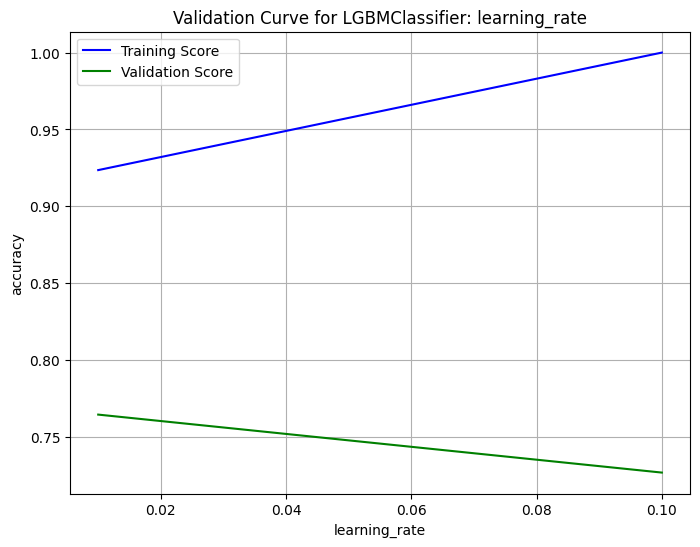

Processing parameter: n_estimators
[LightGBM] [Warning] Unknown parameter: learing_rate
[LightGBM] [Warning] Unknown parameter: learing_rate
[LightGBM] [Info] Number of positive: 214, number of negative: 400
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000064 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 667
[LightGBM] [Info] Number of data points in the train set: 614, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.348534 -> initscore=-0.625489
[LightGBM] [Info] Start training from score -0.625489
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -in

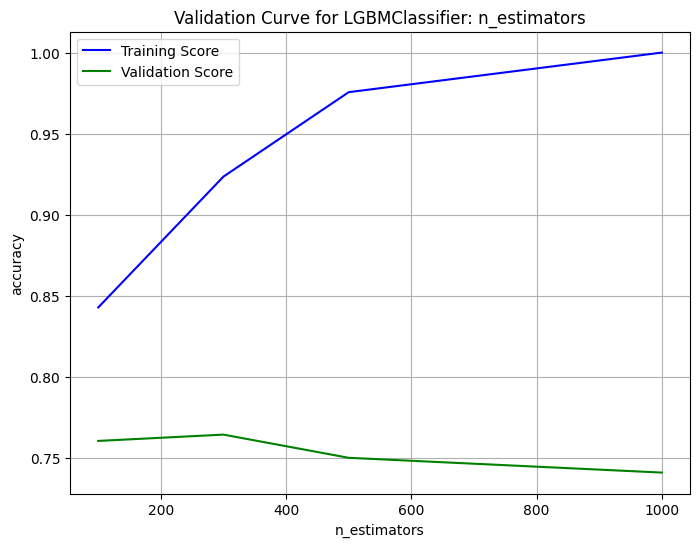

Processing parameter: colsample_bytree
[LightGBM] [Warning] Unknown parameter: learing_rate
[LightGBM] [Warning] Unknown parameter: learing_rate
[LightGBM] [Info] Number of positive: 214, number of negative: 400
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000054 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 667
[LightGBM] [Info] Number of data points in the train set: 614, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.348534 -> initscore=-0.625489
[LightGBM] [Info] Start training from score -0.625489
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

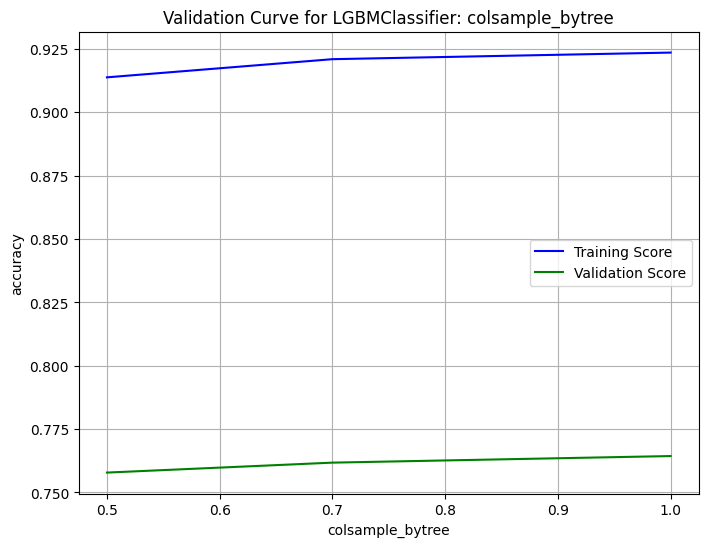

In [40]:
# Fonksiyon çağrısı
scores = val_curve_params_multi(
    model=lgbm_final,
    X=X,
    y=y,
    param_grid=lgbm_params,
    scoring="accuracy",
    cv=5)